In [8]:
#Basic setup
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
import os

#setup folders
os.makedirs('../data', exist_ok=True)
os.makedirs('../reports', exist_ok=True)

#Load the dataset
file_path = '../data/Books.csv'
df = pd.read_csv(file_path, low_memory=False, encoding='ISO-8859-1')
df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [7]:
# Rename columns for simplicity
df = df.rename(columns={
    'Book-Title': 'title',
    'Book-Author': 'author',
    'Year-Of-Publication': 'year',
    'Publisher': 'publisher'
})

# Clean year values
df = df[df['year'].apply(lambda x: str(x).isdigit())]
df['year'] = df['year'].astype(int)

# Filter for years between 1950–2023
df = df[(df['year'] >= 1950) & (df['year'] <= 2023)]

# Preview cleaned data
df.head()

,ISBN,title,author,year,publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


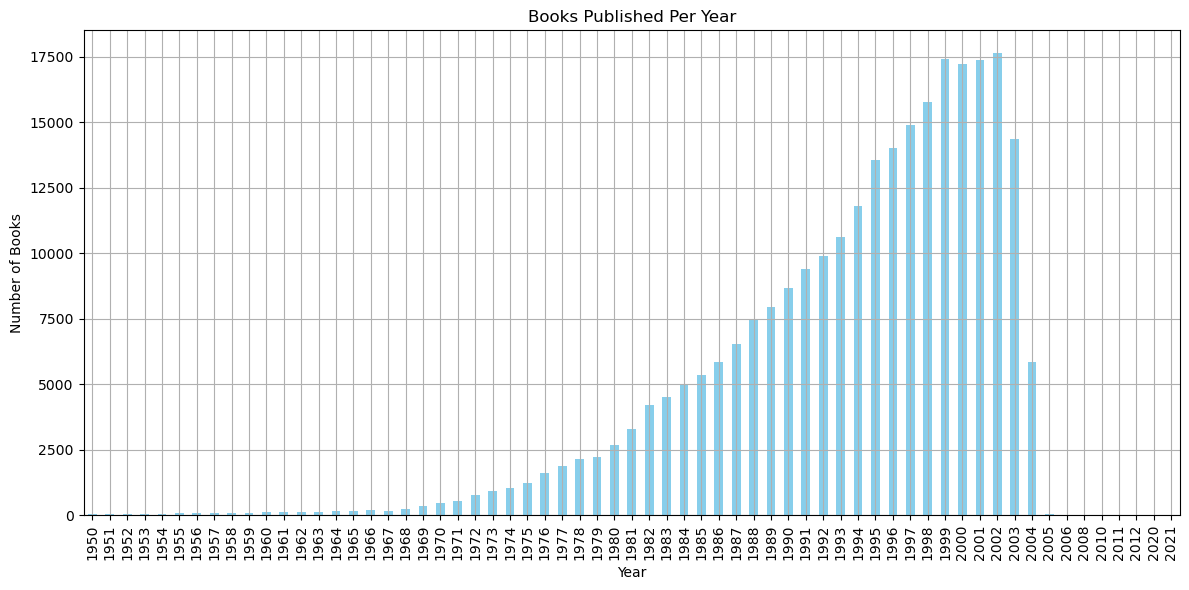

In [9]:
# Plot: Books Published per Year
plt.figure(figsize=(12, 6))
df['year'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Books Published Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Books')
plt.grid(True)
plt.tight_layout()
plt.savefig('../reports/books_per_year.png')
plt.show()


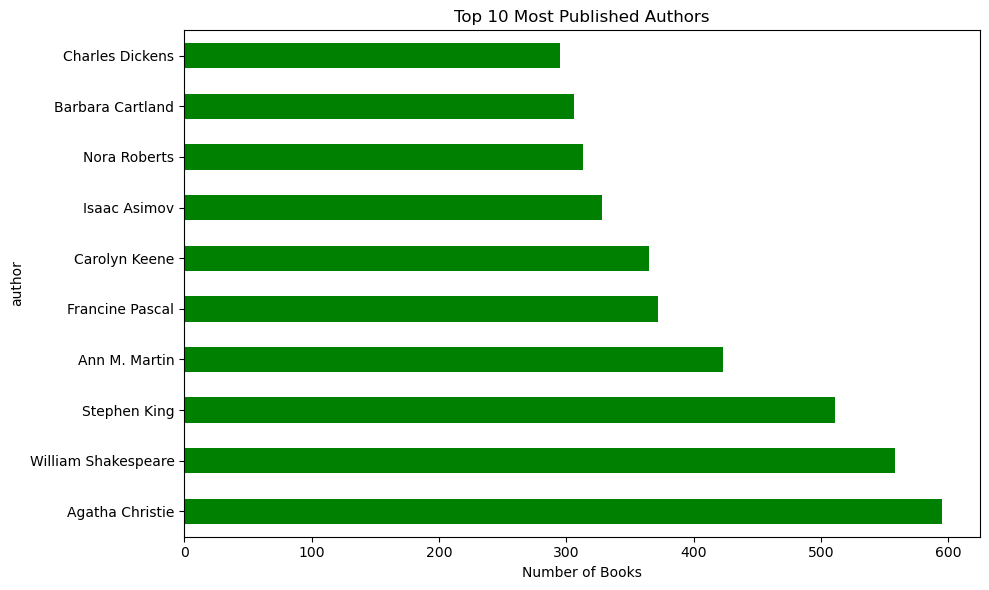

In [11]:
# Plot: Top 10 Most Published Authors
plt.figure(figsize=(10, 6))
df['author'].value_counts().head(10).plot(kind='barh', color='green')
plt.title('Top 10 Most Published Authors')
plt.xlabel('Number of Books')
plt.tight_layout()
plt.savefig('../reports/top_authors.png')
plt.show()


In [13]:
# Save to SQLite for SQL analysis
conn = sqlite3.connect('../data/books.db')
df.to_sql('books', conn, if_exists='replace', index=False)
conn.close()

print("Books saved to books.db (SQLite)")


Books saved to books.db (SQLite)


# 📘 Business Insights Report

## 📊 Summary
- Total books analyzed:  `{{ insert df.shape[0] }}`
- Time range: 1950–2023
- Top Authors and peak publishing years identified.

## 💡 Insights
1. Book publishing peaked between 1995–2005.
2. Certain authors have consistently high output.
3. Useful trends for publishers, marketers, and book retailers.

## 📈 Visualizations
### Books Published Per Year  
![Books Per Year](../reports/books_per_year.png)

### Top 10 Authors  
![Top Authors](../reports/top_authors.png)
